##### Problem Statement:
You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

#### Data Dictonary:
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes

In [84]:
#Import all necessary modules
# For Data analysis and  manipulation
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')
from plotly.subplots import make_subplots

# Data Preprocessing
from sklearn.impute import SimpleImputer # (*, missing_values=nan, strategy='mean', fill_value=None, verbose='deprecated', copy=True, add_indicator=False)
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import scale
import category_encoders as ce
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Metric and scoring library
from sklearn import metrics

# To build linear regression_model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

#Model accurecy check
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from statistics import mean, stdev
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.base import TransformerMixin, BaseEstimator

#Others
from warnings import filterwarnings
filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [85]:
# Reading the data set
df=pd.read_excel('Contraceptive_method_dataset.xlsx',names=['Wife_age','Wife_ education','Husband_education','No_of_children_born',
                                                'Wife_religion','Wife_working','Husband_Occupation','Standard_of_living_index',
                                                'Media_exposure','Contraceptive_method_used'])

In [86]:
#checking the loaded dataset
df.head()


,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.00,Primary,Secondary,3.00,Scientology,No,2,High,Exposed,No
1,45.00,Uneducated,Secondary,10.00,Scientology,No,3,Very High,Exposed,No
2,43.00,Primary,Secondary,7.00,Scientology,No,3,Very High,Exposed,No
3,42.00,Secondary,Primary,9.00,Scientology,No,3,High,Exposed,No
4,36.00,Secondary,Secondary,8.00,Scientology,No,3,Low,Exposed,No


In [87]:
#Check the information about the various data types of the variables in the data frame. Also check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


Total 1473 data are present in data setin 10 columns.All type of data are present like float64(2), int64(1), object(7), uint8(3).

In [88]:
# Shape of dataset
df.shape

(1473, 10)

In [89]:
#unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

WIFE_ EDUCATION :  4
Uneducated    152
Primary       334
Secondary     410
Tertiary      577
Name: Wife_ education, dtype: int64


HUSBAND_EDUCATION :  4
Uneducated     44
Primary       178
Secondary     352
Tertiary      899
Name: Husband_education, dtype: int64


WIFE_RELIGION :  2
Non-Scientology     220
Scientology        1253
Name: Wife_religion, dtype: int64


WIFE_WORKING :  2
Yes     369
No     1104
Name: Wife_working, dtype: int64


STANDARD_OF_LIVING_INDEX :  4
Very Low     129
Low          229
High         431
Very High    684
Name: Standard_of_living_index, dtype: int64


MEDIA_EXPOSURE :  2
Not-Exposed     109
Exposed        1364
Name: Media_exposure, dtype: int64


CONTRACEPTIVE_METHOD_USED :  2
No     629
Yes    844
Name: Contraceptive_method_used, dtype: int64




In [90]:
# Detrmining unique values for Numerical variables
unique_counts = []
for col in df.columns:
    unique_counts.append((col, df[col].nunique()))
unique_counts = sorted(unique_counts, key=lambda x: x[1],reverse = True)
print("No of unique values in each column are as follows:(In Descending order)\n")
for col,nunique in unique_counts:
    print(f"{col}: {nunique}: {round(nunique/8192*100,2)}%")

No of unique values in each column are as follows:(In Descending order)

Wife_age: 34: 0.42%
No_of_children_born: 15: 0.18%
Wife_ education: 4: 0.05%
Husband_education: 4: 0.05%
Husband_Occupation: 4: 0.05%
Standard_of_living_index: 4: 0.05%
Wife_religion: 2: 0.02%
Wife_working: 2: 0.02%
Media_exposure: 2: 0.02%
Contraceptive_method_used: 2: 0.02%


#### Exploreatory Data Analysis: Five fold statistical summary

In [91]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1402.00,NaN,NaN,NaN,32.61,8.27,16.00,26.00,32.00,39.00,49.00
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1452.00,NaN,NaN,NaN,3.25,2.37,0.00,1.00,3.00,4.00,16.00
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.00,NaN,NaN,NaN,2.14,0.86,1.00,1.00,2.00,3.00,4.00
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Checking & Dropping off Duplicate Values

In [92]:
# Checking duplicate values
print('The number of duplicated values are :', df.duplicated().sum())

The number of duplicated values are : 80


In [93]:
# Dropping the Duplicated values
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1473, 10)
After (1393, 10)


##### Checking & Imputing of Missing Values

In [94]:
#Detection of Missing value and its percentage
for col in df.columns:
    if df[col].isnull().sum()>=0:
        print(f"{col}: {df[col].isnull().sum()}: {round(df[col].isnull().mean()*100,2)}%")

Wife_age: 67: 4.81%
Wife_ education: 0: 0.0%
Husband_education: 0: 0.0%
No_of_children_born: 21: 1.51%
Wife_religion: 0: 0.0%
Wife_working: 0: 0.0%
Husband_Occupation: 0: 0.0%
Standard_of_living_index: 0: 0.0%
Media_exposure: 0: 0.0%
Contraceptive_method_used: 0: 0.0%


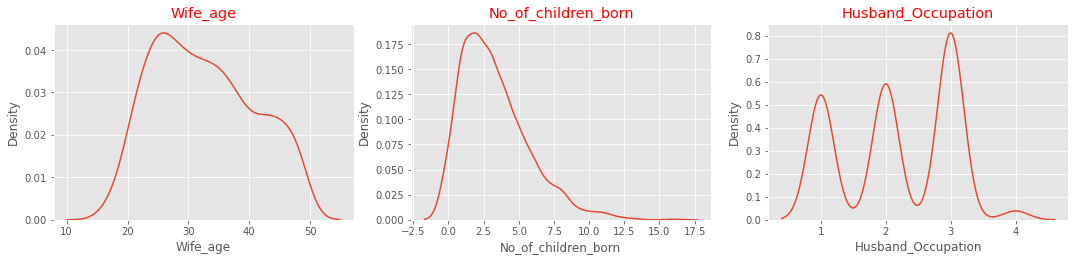

In [95]:
#Data Distribution of each variable
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

In [96]:
#Imputing the missing values with MEAN
dfnum=df[df.isnull().sum()[df.isnull().sum()>0].index].select_dtypes("float64")

for col in dfnum.columns:
    df[col]=df[col].fillna(df[col].mean())

In [97]:
# Missing value and its percentage afer treatment by MEAN
for col in df.columns:
    if df[col].isnull().sum()>=0:
        print(f"{col}: {df[col].isnull().sum()}: {round(df[col].isnull().mean()*100,2)}%")

Wife_age: 0: 0.0%
Wife_ education: 0: 0.0%
Husband_education: 0: 0.0%
No_of_children_born: 0: 0.0%
Wife_religion: 0: 0.0%
Wife_working: 0: 0.0%
Husband_Occupation: 0: 0.0%
Standard_of_living_index: 0: 0.0%
Media_exposure: 0: 0.0%
Contraceptive_method_used: 0: 0.0%


In [98]:
#to check Skewness of data after treatment with Median
import scipy.stats as stats
skewness = pd.DataFrame({'skewness' : [stats.skew(df.Wife_age),stats.skew(df.No_of_children_born)]},
                        index=['Wife_age','No_of_children_born'])
skewness

,skewness
Wife_age,0.27
No_of_children_born,1.09


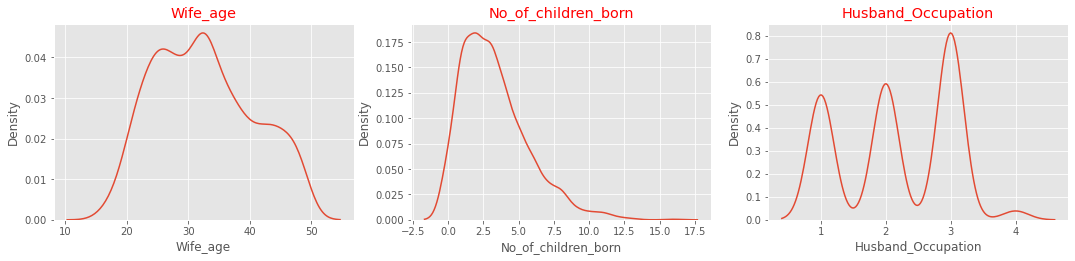

In [99]:
#Data Distribution of each variable
dfnum=df.select_dtypes(["int64","float64"])
data_plot=dfnum
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show() 

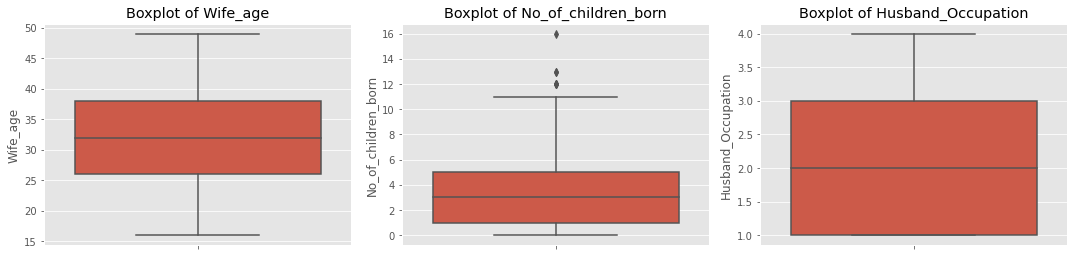

In [100]:
# Outlier Detection
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [101]:
# Treatment of Outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [102]:
for column in dfnum.columns:
    lr,ur=remove_outlier(dfnum[column])
    dfnum[column]=np.where(dfnum[column]>ur,ur,dfnum[column])
    dfnum[column]=np.where(dfnum[column]<lr,lr,dfnum[column])

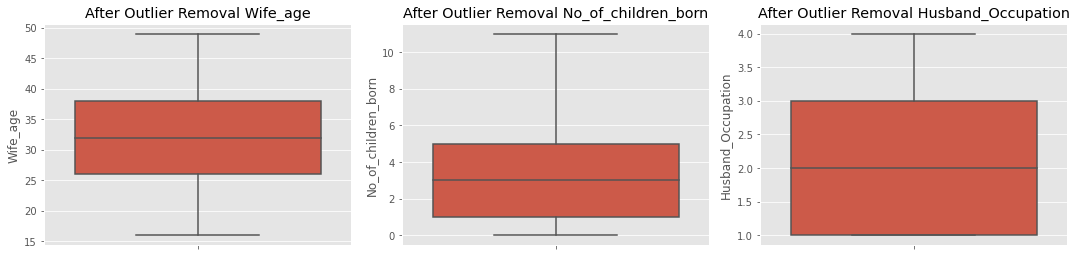

In [103]:
plt.figure(figsize = (20,20))
feature_list = dfnum.columns[:]
for i in range(len(feature_list)):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y = dfnum[feature_list[i]], data = dfnum)
    plt.title('After Outlier Removal {}'.format(feature_list[i]))
    plt.tight_layout()

To treat the outliers in the data, we can create a user defined function (UDF) to calculate the lower range and upper range of the data in a particular column. Once detected, the values below lower range can be replaced by the lower range value, and the values above the upper range can be replaced by the upper range value, of the specific column. This will ensure that the data does not have outliers. The outliers can also be eliminated from the dataset, but this will depend on the share of the outliers in the data, and also a discussion with the business team. In this case, we will proceed with the former approach i.e., replacing the outlier values by the lower range and upper range values, however applicable.

#### Analysis using various numerical and graphical techniques on each of our variables

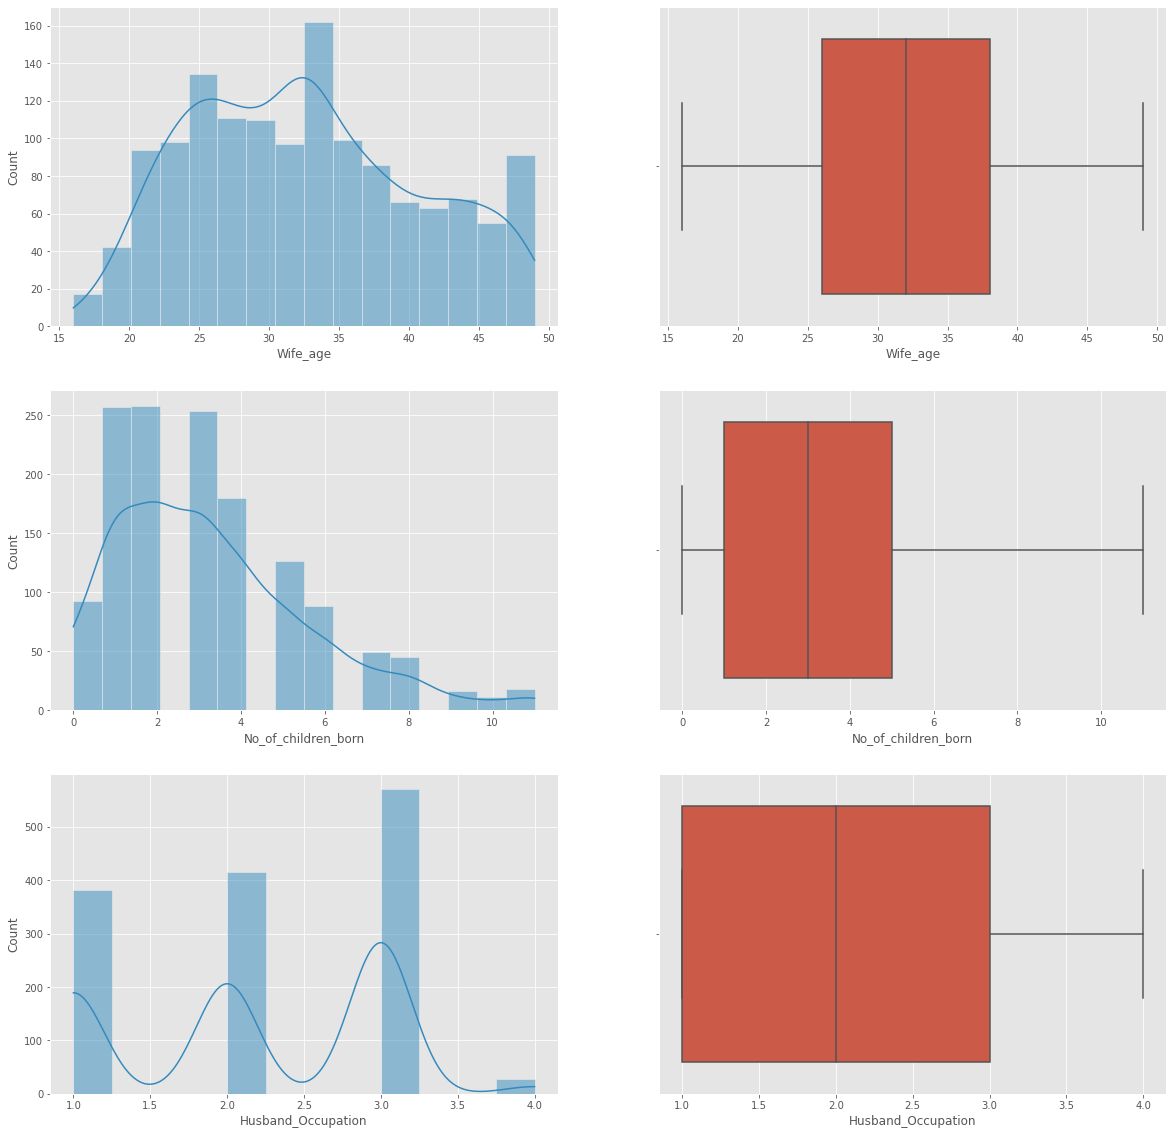

In [104]:
# Univariate Analysis
fig, ax= plt.subplots(3,2, figsize=(20,20))
i=0
j=0
for col in dfnum.columns:
    sns.histplot(x=dfnum[col], ax=ax[i][j], kde=True)
    sns.boxplot(x=dfnum[col], ax=ax[i][j+1])
    i=i+1

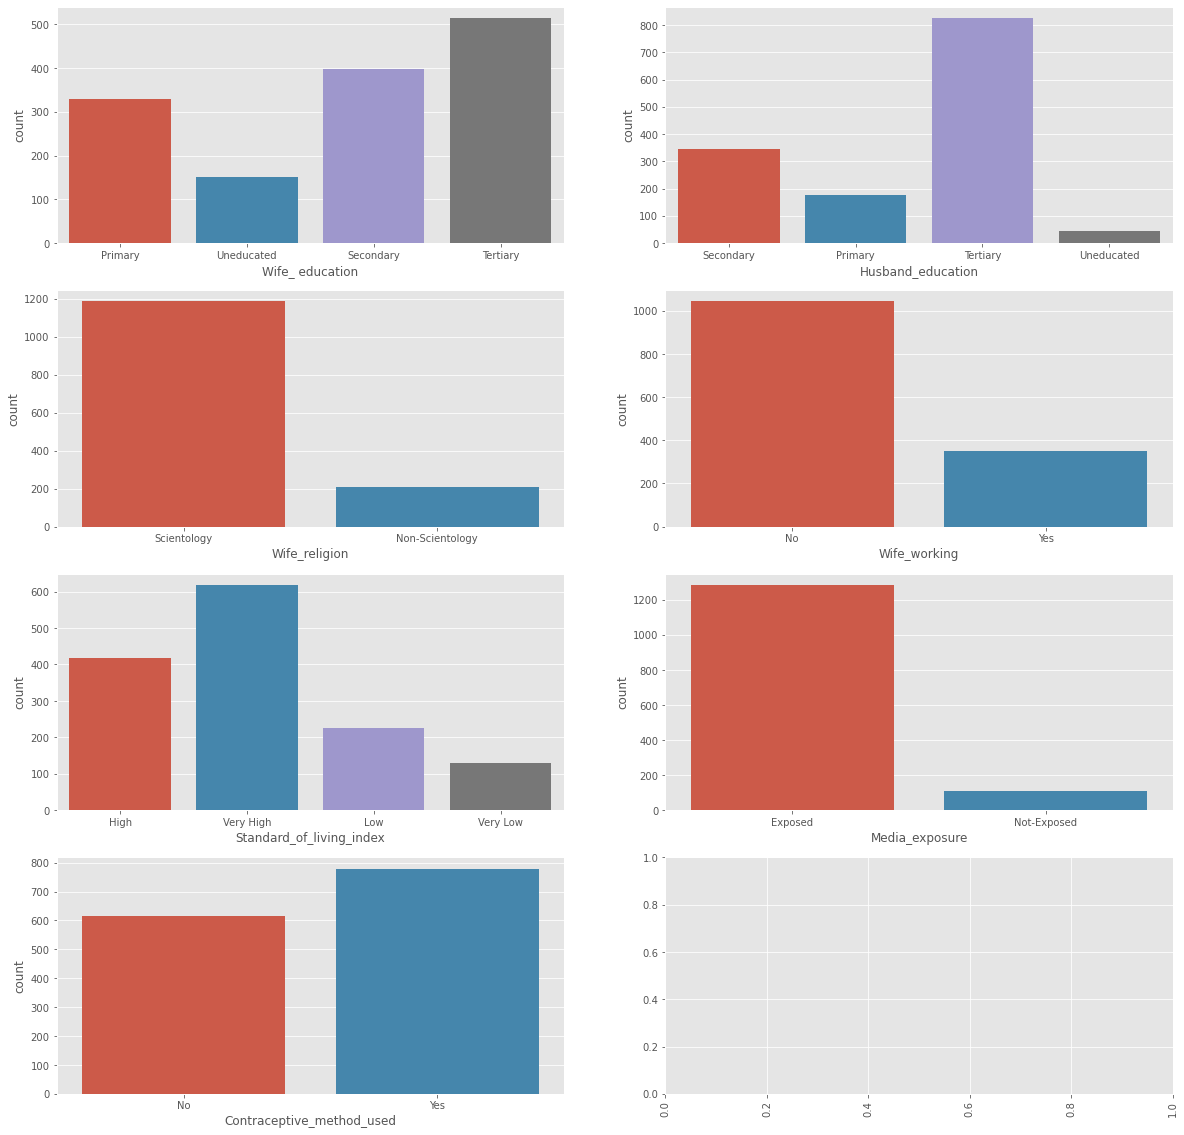

In [105]:
dfcat=df.select_dtypes(["object","category"])
fig, ax= plt.subplots(4,2, figsize=(20,20))
i=0
j=0
for col in dfcat.columns[0:7]:
    sns.countplot(x=dfcat[col], ax=ax[i][j])
    plt.xticks(rotation="vertical")
    j=j+1
    if j>1:
        i=i+1
        j=0


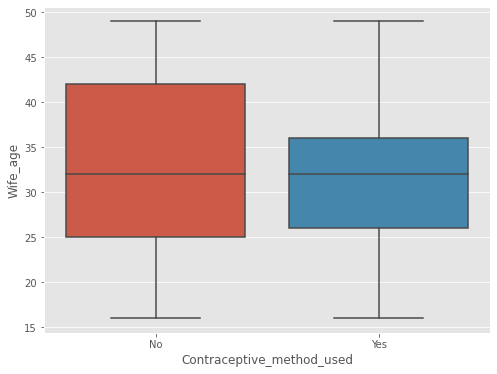

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Contraceptive_method_used',y='Wife_age',data=df);

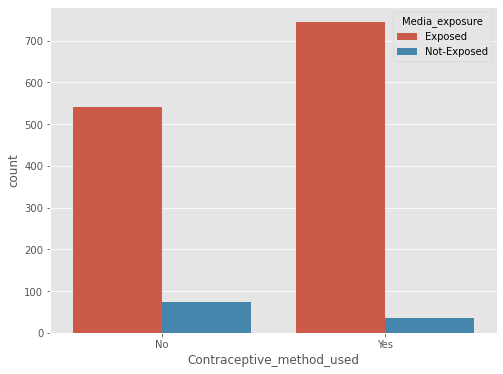

In [107]:
plt.figure(figsize=(8,6))
sns.countplot(x='Contraceptive_method_used',data=df,hue="Media_exposure");

<AxesSubplot:xlabel='Contraceptive_method_used', ylabel='count'>

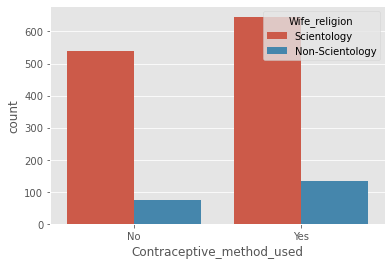

In [108]:
sns.countplot(x='Contraceptive_method_used',data=df,hue="Wife_religion")

Insight:
Visualsation showing that the proportion of user and Non user of contraceptive are almost equal.
Use of contraceptive is almost independent of media exposure and age of wife.
In the data the majority are with women which are using contraceptive methods.
    

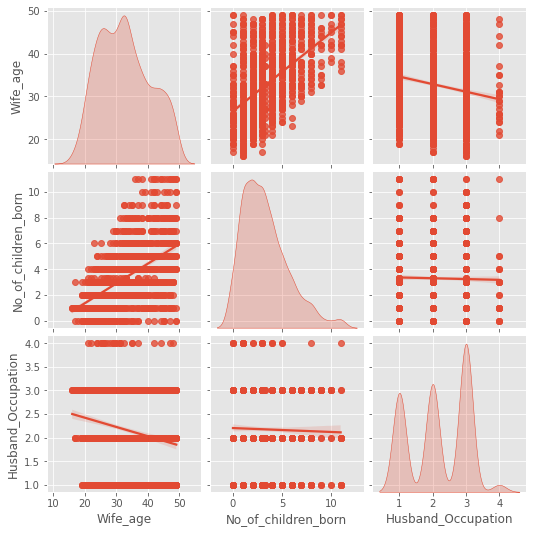

In [109]:
# Bivariate Analysis : Regression line to the above graph to get a better picture
sns.pairplot(data = dfnum, kind='reg', diag_kind = 'kde')
plt.show()

Insight:
There is No such good trend are visible in bivariate analysis.

In [110]:
corr=df.corr()

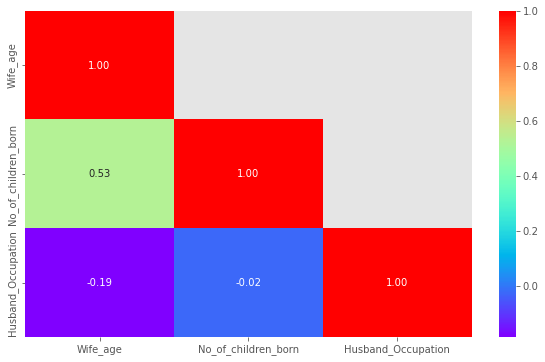

In [111]:
# Multivariate Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.iloc[:,0:11].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,0:11].corr(),+1))
plt.show()

Insight:There is NO any strong correlation are observed.
    

#### Encoding of Categorical Columns

##### The following code loops through each column and checks if the column type is object then converts those columns into categorical with each distinct value becoming a category.

In [112]:
#Since data are composed of categorical values, use LabelEncoder() to encode into numeric values
le = LabelEncoder()
df['Contraceptive_method_used'] = le.fit_transform(df['Contraceptive_method_used'])

In [113]:
# One Hot encoding for few categorical which qulaify for it drop_first=True will drop one of the two 
df = pd.get_dummies(df,columns=["Wife_religion","Wife_working","Media_exposure"],drop_first=True)
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_working_Yes,Media_exposure_Not-Exposed
0,24.00,Primary,Secondary,3.00,2,High,0,1,0,0
1,45.00,Uneducated,Secondary,10.00,3,Very High,0,1,0,0
2,43.00,Primary,Secondary,7.00,3,Very High,0,1,0,0
3,42.00,Secondary,Primary,9.00,3,High,0,1,0,0
4,36.00,Secondary,Secondary,8.00,3,Low,0,1,0,0


In [114]:
# Encoding of ordinal categories
mapping= {'Uneducated':1,'Primary':2, 'Secondary':3, 'Tertiary':4}
df['Wife_ education']=df['Wife_ education'].map(mapping)
df['Husband_education']=df['Husband_education'].map(mapping)
mapping1={'Very Low':1,'Low': 2,'High':3,'Very High':4}
df['Standard_of_living_index']=df['Standard_of_living_index'].map(mapping1)

df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_working_Yes,Media_exposure_Not-Exposed
0,24.00,2,3,3.00,2,3,0,1,0,0
1,45.00,1,3,10.00,3,4,0,1,0,0
2,43.00,2,3,7.00,3,4,0,1,0,0
3,42.00,3,2,9.00,3,3,0,1,0,0
4,36.00,3,3,8.00,3,2,0,1,0,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Wife_age                    1393 non-null   float64
 1   Wife_ education             1393 non-null   int64  
 2   Husband_education           1393 non-null   int64  
 3   No_of_children_born         1393 non-null   float64
 4   Husband_Occupation          1393 non-null   int64  
 5   Standard_of_living_index    1393 non-null   int64  
 6   Contraceptive_method_used   1393 non-null   int32  
 7   Wife_religion_Scientology   1393 non-null   uint8  
 8   Wife_working_Yes            1393 non-null   uint8  
 9   Media_exposure_Not-Exposed  1393 non-null   uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 85.7 KB


Total 1393 data are present in data setin 10 columns.All type of data are present like float64(2), int64(4), object(1), uint8(3).

#### Analysing Target variable Contraceptive_method_used 

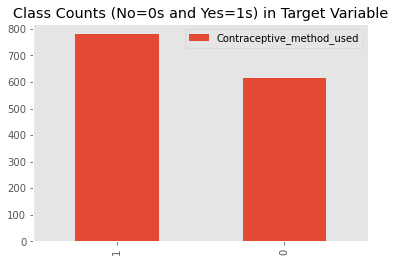

In [116]:
#Value Counts of Target variable Contraceptive_method_used
plt.figure(figsize=(6,4))
df["Contraceptive_method_used"].value_counts().plot(kind='bar')
plt.legend()
plt.title('Class Counts (No=0s and Yes=1s) in Target Variable')
plt.grid()
plt.show()

#### Extracting the target column into separate vectors for training set and test set

In [117]:
#Extracting the target column into separate vectors for training set and test set
X = df.drop("Contraceptive_method_used", axis=1)

y = df.pop("Contraceptive_method_used")

X.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_working_Yes,Media_exposure_Not-Exposed
0,24.00,2,3,3.00,2,3,1,0,0
1,45.00,1,3,10.00,3,4,1,0,0
2,43.00,2,3,7.00,3,4,1,0,0
3,42.00,3,2,9.00,3,3,1,0,0
4,36.00,3,3,8.00,3,2,1,0,0


In [118]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [119]:
#checking of Diamention of data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',975+418)

X_train (975, 9)
X_test (418, 9)
y_train (975,)
y_test (418,)
Total Obs 1393


#### LOGISTIC REGRESSION model

In [120]:
#Formulation of LOGISTIC REGRESSION model on the train data.
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_predict=model.predict(X_test)

In [159]:
#Getting model score on train data
model_score=model.score(X_train,y_train)
print('Accuracy Score on train data is ',model_score)

Accuracy Score on train data is  0.6475336322869956


In [162]:
#Getting model score on test data
model_score=model.score(X_test,y_test)
print('Accuracy Score on Test data is ',model_score)

Accuracy Score on Test data is  0.6363636363636364


In [163]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'
      .format(model.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(model.score(X_test,y_test)))

Accuracy of logistic regression classifier on train set: 0.65
Accuracy of logistic regression classifier on test set: 0.64


#### Generate the Confusion Matrix and Classification Report.

Confusion Matrix 
 [[177  15]
 [ 25 201]] 

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       192
           1       0.93      0.89      0.91       226

    accuracy                           0.90       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.90      0.90       418



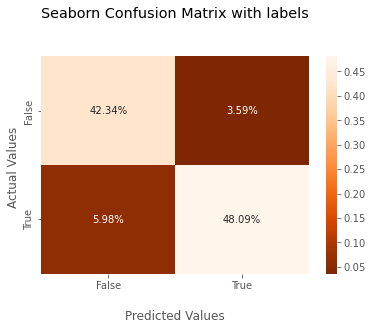

In [164]:
# Plotting confusion Matrix
ax = sns.heatmap(metrics.confusion_matrix(y_test, y_predict)/np.sum(metrics.confusion_matrix(y_test, y_predict)), annot=True, 
            fmt='.2%', cmap='Oranges_r')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, y_predict),'\n')
print('Classification Report','\n',metrics.classification_report(y_test, y_predict))
## Display the visualization of the Confusion Matrix.
plt.show()

##### Tuning of Model

In [125]:
#Runnig K-Fold:
from statistics import mean, stdev
from sklearn.model_selection import KFold, cross_val_score, cross_validate

kf=KFold(n_splits=5, shuffle=True, random_state=None)

model = LogisticRegression(C=1, solver='lbfgs', multi_class='ovr')
kf_scores=[]

for train_index, test_index in kf.split(X):
    X_train, y_train=X.iloc[train_index], y.iloc[train_index]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    kf_scores.append(accuracy_score(y_test,y_pred))
print(kf_scores)

print('Mean of testing accuracy over 5 folds = %.2f'% mean(kf_scores), 'with std = %.2f'%
      stdev(kf_scores))

[0.638755980861244, 0.6291866028708134, 0.638755980861244, 0.6267942583732058, 0.6363636363636364]
Mean of testing accuracy over 5 folds = 0.63 with std = 0.01


#### LINEAR DISCRIMINANT MODEL/ANALYSIS(LDA)

##### Build the LDA algorithm without scaling the predictor variables and use this model to predict on the test set and compute the confusion matrix

In [126]:
clf=LinearDiscriminantAnalysis()

In [127]:
model1=clf.fit(X_train,y_train)

model1

LinearDiscriminantAnalysis()

In [128]:
# Predict it
pred_class = model1.predict(X_test)

In [129]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55       192
           1       0.64      0.78      0.70       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.63       418



Confusion Matrix 
 [[ 91 101]
 [ 49 177]] 

              precision    recall  f1-score   support

           0       0.65      0.47      0.55       192
           1       0.64      0.78      0.70       226

    accuracy                           0.64       418
   macro avg       0.64      0.63      0.63       418
weighted avg       0.64      0.64      0.63       418



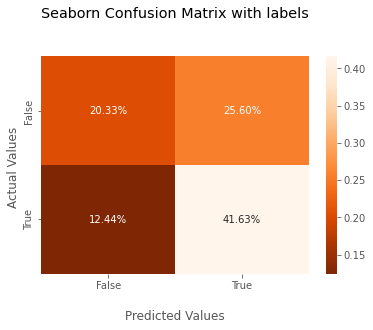

In [130]:
# Plotting confusion Matrix
ax = sns.heatmap(metrics.confusion_matrix(y_test, y_predict)/np.sum(metrics.confusion_matrix(y_test, y_predict)), annot=True, 
            fmt='.2%', cmap='Oranges_r')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print('Confusion Matrix','\n',metrics.confusion_matrix(y_test, pred_class),'\n')
print(classification_report(y_test,pred_class))
## Display the visualization of the Confusion Matrix.
plt.show()

#### Building a Decision Tree Classifier (CART)

In [131]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [132]:
# Fit the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [133]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

In [134]:
#Variable Importance
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                            Imp
Wife_age                   0.31
No_of_children_born        0.23
Standard_of_living_index   0.10
Wife_ education            0.08
Husband_Occupation         0.08
Husband_education          0.08
Wife_working_Yes           0.05
Wife_religion_Scientology  0.04
Media_exposure_Not-Exposed 0.03


In [135]:
#Predicting Test Data
y_predict = dt_model.predict(X_test)

In [136]:
y_predict.shape

(418,)

##### Regularising the Decision Tree

In [137]:
# Tuning Parameters
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 30,min_samples_leaf=100,min_samples_split=1000,random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=100,
                       min_samples_split=1000, random_state=1)

In [138]:
# Generating New tree
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [139]:
# Variable importance
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                            Imp
No_of_children_born        1.00
Wife_age                   0.00
Wife_ education            0.00
Husband_education          0.00
Husband_Occupation         0.00
Standard_of_living_index   0.00
Wife_religion_Scientology  0.00
Wife_working_Yes           0.00
Media_exposure_Not-Exposed 0.00


In [140]:
#Predicting on Training and Test dataset
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [141]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (1115,)
ytest_predict (418,)


In [142]:
# Geeting predicted Class
ytest_predict

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [143]:
# Getting the predicted Probabilities
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.66784452, 0.33215548],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.66784452, 0.33215548],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.37019231, 0.62980769],
       [0.

In [144]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.37,0.63
1,0.37,0.63
2,0.37,0.63
3,0.37,0.63
4,0.37,0.63


### Model Evaluation

##### Measuring AUC-ROC Curve

AUC: 0.614


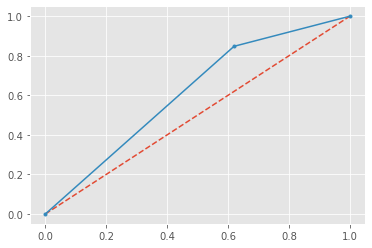

In [165]:
# predict probabilities : AUC -ROC curve on Train data
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.574


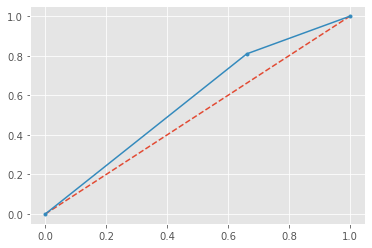

In [166]:
# predict probabilities: AUC -ROC curve on Test data
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

##### Confusion Matrix for the training data

In [167]:
confusion_matrix(y_train, ytrain_predict)

array([[189, 308],
       [ 94, 524]], dtype=int64)

In [168]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train) 

0.6394618834080718

In [169]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.38      0.48       497
           1       0.63      0.85      0.72       618

    accuracy                           0.64      1115
   macro avg       0.65      0.61      0.60      1115
weighted avg       0.65      0.64      0.62      1115



In [170]:
# Getting accuracy and summary of on different cuts in CART
pred_prob_train1 = model.predict_proba(X_train)
pred={}
for cut in [0.1,0.2,0.3,0.4,0.45]:
    pred_train1=[]
    for i in pred_prob_train1[:,1]:
        if i > cut:
            pred_train1.append(1)
        else:
            pred_train1.append(0)
    pred[cut]= pred_train1   

In [171]:
for cut in [0.1,0.2,0.3,0.4,0.45]:
    print('Classification Report of the training data for cutoff of ', cut, ':\n\n',metrics.classification_report(y_train,pred[cut]),'\n')
#len(pred[0.45])

Classification Report of the training data for cutoff of  0.1 :

               precision    recall  f1-score   support

           0       1.00      0.02      0.04       497
           1       0.56      1.00      0.72       618

    accuracy                           0.56      1115
   macro avg       0.78      0.51      0.38      1115
weighted avg       0.76      0.56      0.42      1115
 

Classification Report of the training data for cutoff of  0.2 :

               precision    recall  f1-score   support

           0       0.93      0.07      0.14       497
           1       0.57      1.00      0.73       618

    accuracy                           0.58      1115
   macro avg       0.75      0.53      0.43      1115
weighted avg       0.73      0.58      0.46      1115
 

Classification Report of the training data for cutoff of  0.3 :

               precision    recall  f1-score   support

           0       0.88      0.21      0.34       497
           1       0.61      0.98  

##### Confusion Matrix for test data


In [172]:
confusion_matrix(y_test, ytest_predict)

array([[ 65, 127],
       [ 43, 183]], dtype=int64)

In [173]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.5933014354066986

In [174]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43       192
           1       0.59      0.81      0.68       226

    accuracy                           0.59       418
   macro avg       0.60      0.57      0.56       418
weighted avg       0.60      0.59      0.57       418



Confusion Matrix 
 [[ 65 127]
 [ 43 183]] 

              precision    recall  f1-score   support

           0       0.60      0.34      0.43       192
           1       0.59      0.81      0.68       226

    accuracy                           0.59       418
   macro avg       0.60      0.57      0.56       418
weighted avg       0.60      0.59      0.57       418



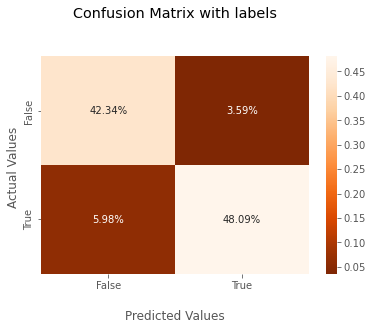

In [175]:
# Plotting confusion Matrix
ax = sns.heatmap(metrics.confusion_matrix(y_test, y_predict)/np.sum(metrics.confusion_matrix(y_test, y_predict)), annot=True, 
            fmt='.2%', cmap='Oranges_r')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

print('Confusion Matrix','\n',confusion_matrix(y_test, ytest_predict),'\n')
print(classification_report(y_test, ytest_predict))
## Display the visualization of the Confusion Matrix.
plt.show()